In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv("NewDataset02.csv")

# Drop SUBJECT_ID and DIAGNOSIS columns
data = data.drop(columns=["SUBJECT_ID", "DIAGNOSIS"])

# Separate features and target variable
X = data.drop(columns=["HOSPITAL_DEATH"])
y = data["HOSPITAL_DEATH"]

# Perform one-hot encoding for categorical variables
categorical_features = ["GENDER", "INSURANCE", "DRG_TYPE", "ETHNICITY"]
categorical_transformer = OneHotEncoder(drop="first")
preprocessor = ColumnTransformer(
    transformers=[("cat", categorical_transformer, categorical_features)],
    remainder="passthrough",
)
X = preprocessor.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train Logistic Regression model
model = Pipeline(steps=[("classifier", LogisticRegression())])
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.50      0.61       587
           1       0.71      0.90      0.79       790

    accuracy                           0.73      1377
   macro avg       0.75      0.70      0.70      1377
weighted avg       0.74      0.73      0.72      1377



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<ipython-input-49-7b501503f5f1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Actual', y='Predicted', data=results, palette='muted')


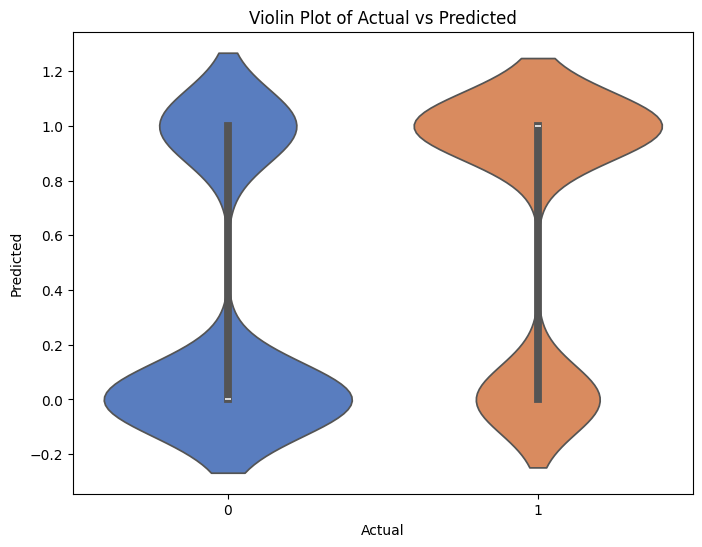

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the actual and predicted values into a DataFrame
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})

# Plot violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Actual', y='Predicted', data=results, palette='muted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Violin Plot of Actual vs Predicted')
plt.show()
